
This notebook is based on the EMG data analysis -a study conducted by the UC of Irvine in California.
Electromyography (EMG) measures muscle response or electrical activity in response to a nerve's stimulation of the muscle. The test is used to help detect neuromuscular abnormalities. During the test, one or more small needles (also called electrodes) are inserted through the skin into the muscle.
Possible Use cases for this type of analysis can be- medical diagnosis or build a human-robot interface.

Dataset: https://archive.ics.uci.edu/ml/datasets/EMG+Physical+Action+Data+Set

Contributed by:
Theo Theodoridis
School of Computer Science and Electronic Engineering
University of Essex

Bio Electrical Signals collected from a group of 4 subjects  who were asked to perform specific physical actions in 2 categories- Normal(hugging, standing etc) and Aggressive (kicking, hammering)
EMG Signal were collected from the following 8 channels (a channel corresponds to an electrode attached on a muscle)-

Muscle: A pair of muscles that corresponds to a segment.
- R-Bic: right bicep (C1)
- R-Tri: right tricep (C2)
- L-Bic: left bicep (C3)
- L-Tri: left tricep (C4)
- R-Thi: right thigh (C5)
- R-Ham: right hamstring (C6)
- L-Thi: left thigh (C7)
- L-Ham: left hamstring (C8)

Each file in the dataset contains in overall 8 columns.

- Measurment frequency 10 per ms.



Neurobiology- the signals that spike when we think of performing an activity (eg Jump), the same signals spike when we actually perform those activities, i.e jump. We can use this to build a ML model that can PREDICT the activity being perfromed based on the signals and can be used to control robotic motions and other diagnostic and monitoring tasks.

We start off by building the dataset- defining features and labels for our machine learning model.

Note: for one activity the signals are captured from the start of the activity to the end of the activity. So we will have multiple rows (approx 10K) of signals corresponding to just one activity. Each row is the signal captured in 1/10msec.

In bio signal processing , spikes matter, so we can take a max of a chunk of 10 readings in 1 msec. So we apply max operation on every sequential 10 observed values (10 rows) this is also called chunking. So 10 rows are replaced by 1 maximum value, this reduces the dataset size. This forms our X.

Class Label (Y) are extracted from the file names(Bowing.txt) by removing the last 4 character.

In [2]:
#### Creating the machine learning dataset for the data recorded from one person.

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn 

actions = {} #defining an empty dictionary for action names and corresponding labels

data_dirs = [os.path.join('emg+physical+action+data+set','EMG Physical Action Data Set','sub1','Aggressive','txt'),
             os.path.join('emg+physical+action+data+set','EMG Physical Action Data Set','sub1','Normal','txt')]

ind = 0
data = pd.DataFrame()

for dirs in data_dirs:

  for files in os.listdir(dirs):
    path = os.path.join(dirs, files)
    print(path)
    with open(path, "r") as f:  # from all the files within all the dirs, read the tab separated files.

     # Extracting the 8 columns names from filenames
      temp = pd.read_csv(f.name,
                        sep = "\t",
                        header = None, 
                        names = ["ch" + str(i) for i in range(1, 9)] # 8 input channels
                        )
      
      # chunking using Max of every 10 sequential values.
      temp_chunked = pd.DataFrame()

      for i in range(0, len(temp), 10):
        chunk_max = temp.iloc[i:i+10].max()
        temp_chunked = pd.concat([temp_chunked, pd.DataFrame(chunk_max).T], ignore_index=True)

      # Defining the class labels 

      labels = [files[:-4] for i in range(len(temp_chunked))] # remove the last 4 characters=".txt" from the filename to get the activity name
      if files[:-4] not in actions:
          actions[files[:-4]] = ind # We have about 20 activity classes and they are assigned a numeric labels in the actions dictionary.
          ind += 1
      temp_chunked["Action"] = labels

      # Final Data pro
      data = pd.concat([data, temp_chunked])

print(actions)

emg+physical+action+data+set\EMG Physical Action Data Set\sub1\Aggressive\txt\Elbowing.txt
emg+physical+action+data+set\EMG Physical Action Data Set\sub1\Aggressive\txt\Frontkicking.txt
emg+physical+action+data+set\EMG Physical Action Data Set\sub1\Aggressive\txt\Hamering.txt
emg+physical+action+data+set\EMG Physical Action Data Set\sub1\Aggressive\txt\Headering.txt
emg+physical+action+data+set\EMG Physical Action Data Set\sub1\Aggressive\txt\Kneeing.txt
emg+physical+action+data+set\EMG Physical Action Data Set\sub1\Aggressive\txt\Pulling.txt
emg+physical+action+data+set\EMG Physical Action Data Set\sub1\Aggressive\txt\Punching.txt
emg+physical+action+data+set\EMG Physical Action Data Set\sub1\Aggressive\txt\Pushing.txt
emg+physical+action+data+set\EMG Physical Action Data Set\sub1\Aggressive\txt\Sidekicking.txt
emg+physical+action+data+set\EMG Physical Action Data Set\sub1\Aggressive\txt\Slapping.txt
emg+physical+action+data+set\EMG Physical Action Data Set\sub1\Normal\txt\Bowing.txt


The pandas dataframe for our dataset is now ready.

### Exploratory data analysis

In [6]:
data.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,Action
0,717,391,2615,-29,4000,205,1084,4000,Elbowing
1,1036,251,2989,162,4000,2971,3062,4000,Elbowing
2,3705,30,4000,549,4000,2940,-1767,-205,Elbowing
3,2679,347,1566,167,-4000,2758,-3965,785,Elbowing
4,1689,77,4000,-246,4000,2422,-1767,360,Elbowing


Each cell for ch1-ch8 corresponds to the maximum value of the signal recorded in 1msec

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19711 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ch1     19711 non-null  int64 
 1   ch2     19711 non-null  int64 
 2   ch3     19711 non-null  int64 
 3   ch4     19711 non-null  int64 
 4   ch5     19711 non-null  int64 
 5   ch6     19711 non-null  int64 
 6   ch7     19711 non-null  int64 
 7   ch8     19711 non-null  int64 
 8   Action  19711 non-null  object
dtypes: int64(8), object(1)
memory usage: 1.5+ MB


We have a total of 19711 observations for one subject. Fro simplicity we are considering data from one subject, for more rigorous analysis , data from all 4 subjects should be included.

In [8]:
data["Action"].value_counts()

Action
Headering       1000
Hamering        1000
Clapping        1000
Kneeing         1000
Seating         1000
Walking         1000
Waving          1000
Jumping         1000
Running          997
Sidekicking      983
Bowing           983
Frontkicking     982
Slapping         979
Elbowing         978
Hugging          976
Standing         973
Pushing          968
Pulling          966
Punching         964
Handshaking      962
Name: count, dtype: int64

### Fairly well balanced data

In [9]:
X=data.drop(["Action"], axis=1)
X

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,717,391,2615,-29,4000,205,1084,4000
1,1036,251,2989,162,4000,2971,3062,4000
2,3705,30,4000,549,4000,2940,-1767,-205
3,2679,347,1566,167,-4000,2758,-3965,785
4,1689,77,4000,-246,4000,2422,-1767,360
...,...,...,...,...,...,...,...,...
995,577,8,9,8,47,32,40,-5
996,97,52,32,12,54,46,36,35
997,399,72,24,10,28,62,59,42
998,428,63,6,4,47,69,18,47


In [10]:
Y=data["Action"]
Y

0      Elbowing
1      Elbowing
2      Elbowing
3      Elbowing
4      Elbowing
         ...   
995      Waving
996      Waving
997      Waving
998      Waving
999      Waving
Name: Action, Length: 19711, dtype: object

In [11]:
## Label encoding the target variable

# Label encoding
Y = Y.map(actions) # actions is the dictionary we created earlier.
Y.head()
print(Y.value_counts())

Action
3     1000
2     1000
11    1000
4     1000
16    1000
18    1000
19    1000
14    1000
15     997
8      983
10     983
1      982
9      979
0      978
13     976
17     973
7      968
5      966
6      964
12     962
Name: count, dtype: int64


In [12]:
### Domain Specified Pre-Processing- we will take the rectified EMG signals as we dont care about the negative spikes.

X=abs(X)
X.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,717,391,2615,29,4000,205,1084,4000
1,1036,251,2989,162,4000,2971,3062,4000
2,3705,30,4000,549,4000,2940,1767,205
3,2679,347,1566,167,4000,2758,3965,785
4,1689,77,4000,246,4000,2422,1767,360


Fortunately in bio-medical world , and in our dataset as well, the data is numeric, so we don't need to perform any categorical encoding.

In [13]:
# Train, test split

from sklearn.model_selection import train_test_split

X = np.array(X.values.tolist())
Y = np.array(Y.values.tolist())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True) # 80-20 split
print(f"Sizes of the sets created are:\nTraining set:{X_train.shape[0]}\nTest set:{X_test.shape[0]}")

Sizes of the sets created are:
Training set:15768
Test set:3943


## Training the model using cross validation

In [14]:
# We train a simple decision tree using 5-fold cross validation and Grid Search for best hyper-param selection
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [3, 5, 7],
    "max_leaf_nodes" : [15, 20, 25]
}

model1 = DTC()
clf = GridSearchCV(model1, params, scoring = "accuracy", cv=5)

clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [15, 20, 25]},
             scoring='accuracy')

## Displaying the grid-search results

In [15]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'max_depth': 3, 'max_leaf_nodes': 15} Mean_score: 0.3151957019323727 Rank: 7
Parameters:{'max_depth': 3, 'max_leaf_nodes': 20} Mean_score: 0.3151957019323727 Rank: 7
Parameters:{'max_depth': 3, 'max_leaf_nodes': 25} Mean_score: 0.3151957019323727 Rank: 7
Parameters:{'max_depth': 5, 'max_leaf_nodes': 15} Mean_score: 0.39700835491799435 Rank: 5
Parameters:{'max_depth': 5, 'max_leaf_nodes': 20} Mean_score: 0.43042999782192515 Rank: 3
Parameters:{'max_depth': 5, 'max_leaf_nodes': 25} Mean_score: 0.4362641210341893 Rank: 2
Parameters:{'max_depth': 7, 'max_leaf_nodes': 15} Mean_score: 0.39700835491799435 Rank: 5
Parameters:{'max_depth': 7, 'max_leaf_nodes': 20} Mean_score: 0.4216782398259471 Rank: 4
Parameters:{'max_depth': 7, 'max_leaf_nodes': 25} Mean_score: 0.4380401670782484 Rank: 1


In [16]:
print(clf.best_estimator_)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=25)


In [17]:
# Learning Curves in sklearn

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, Y, title):

  train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator,
                                                                        X,
                                                                        Y,
                                                                        return_times=True
                                                                        )

  fig, axes = plt.subplots(1, 1, figsize = (10, 5))

  axes.set_title(title)
  axes.plot
  axes.set_xlabel("Training examples")
  axes.set_ylabel("Score")


  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  # Plot learning curve
  axes.grid()
  axes.fill_between(
      train_sizes,
      train_scores_mean - train_scores_std,
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="r",
  )
  axes.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="g",
  )
  axes.plot(
      train_sizes, train_scores_mean, "o-", color="r", label="Training score"
  )
  axes.plot(
      train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
  )
  axes.legend(loc="best")

  plt.show()

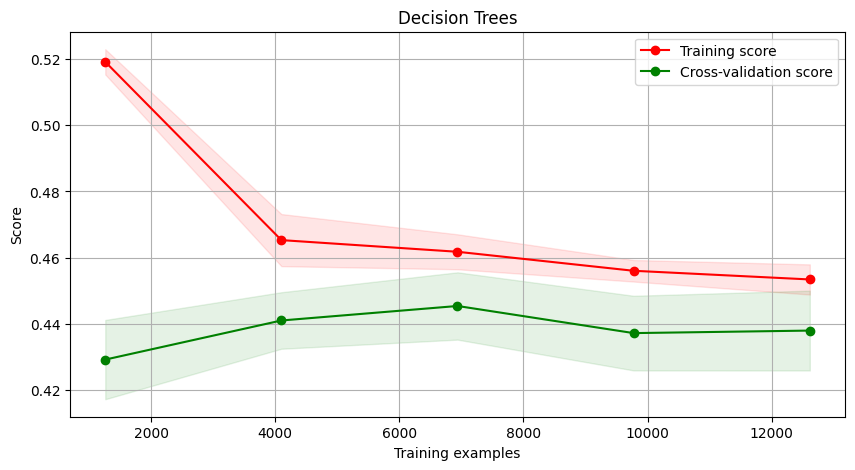

0.45421106037544395


In [18]:
model1 = clf.best_estimator_

model1.fit(X_train, Y_train)

plot_learning_curve(model1, X_train, Y_train, "Decision Trees")

print(model1.score(X_train, Y_train))

# more data could help as CV-score is improving as datset size increases.

### Accuracy of a simple decision tree classifier is 45%.

### When the data size is small the model overfits and we see big difference between the training score and cv score. As training samples increases, the training and cross validations score curves tend to converge.

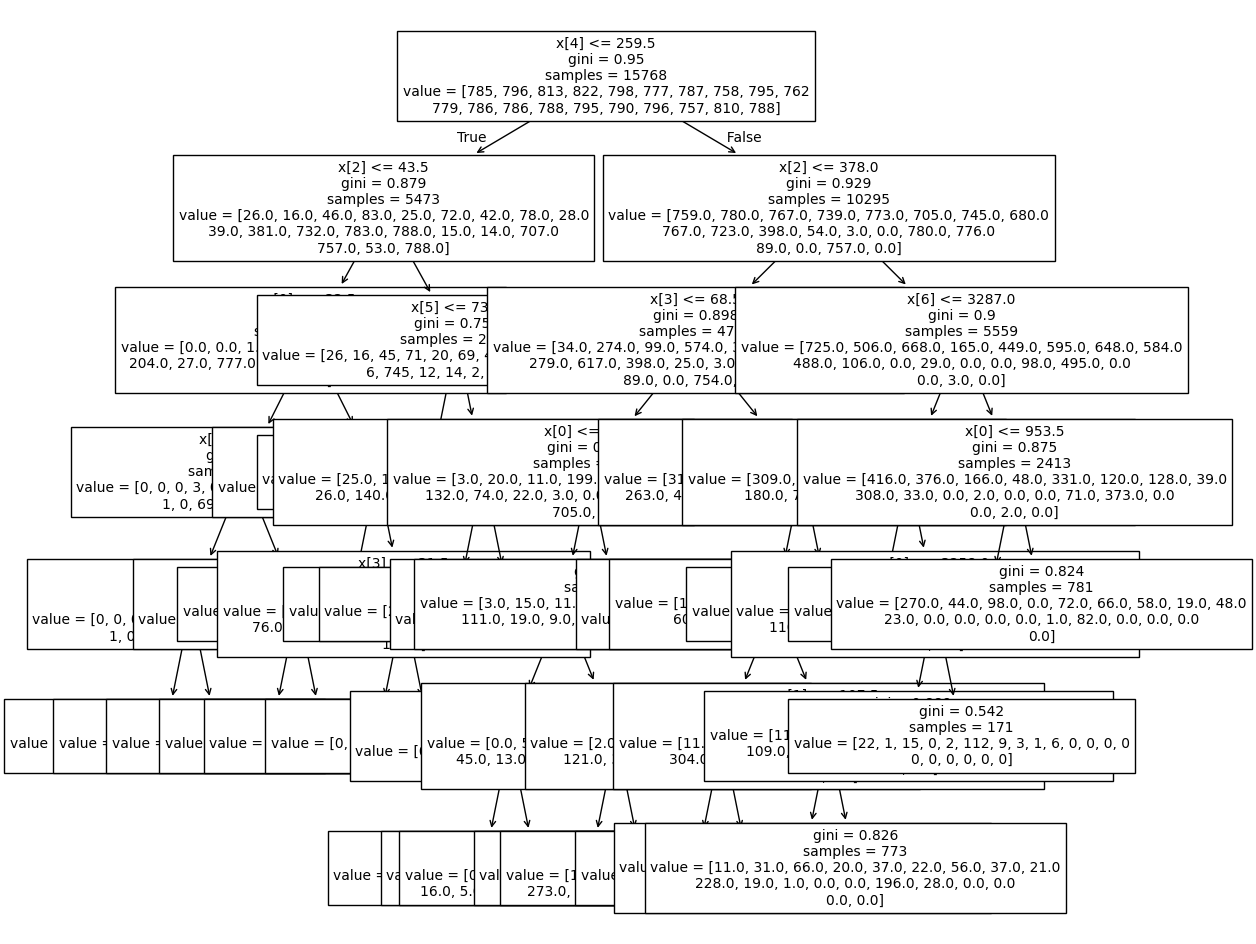

In [19]:
# plot the decision tree
from sklearn import tree

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(model1, fontsize=10)
plt.show()

In [22]:
# Xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold  #StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains 
#approximately the same percentage of samples of each target class as the complete set.Our dataset has balanced classes, so not useful.
import datetime as dt

params = {
        'learning_rate': [0.1, 0.5, 0.8],   # shrinkage coefficient - "v" [0,1]
        'subsample': [0.6, 0.8, 1.0],     # concept of bagging in xgboost- row sampling
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, silent=False) #100 base learners, for multiclass- log loss does not work. need softmax




In [23]:
folds = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,Y_train), verbose=3, random_state=1001 )

# number of iterations=10, n_jobs=4= it will try to distribute it across 4 cores

start = dt.datetime.now()
random_search.fit(X_train, Y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Bernard\envs\ML_Proj\lib\site-packages\xgboost\core.py:158: UserWarning: [17:44:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [24]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.6, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


### Training the classifier using the best parameters on the complete training data

In [25]:
best_xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, subsample=0.6, max_depth=3, learning_rate=0.1, colsample_bytree=1.0, silent=True)
best_xgb.fit(X_train, Y_train)

c:\Users\Bernard\envs\ML_Proj\lib\site-packages\xgboost\core.py:158: UserWarning: [17:44:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=20,
              num_parallel_tree=None, ...)

In [26]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_xgb.score(X_train, Y_train)}\nTest Accuracy: {best_xgb.score(X_test, Y_test)}")

Time taken for training : 0:00:26.947277
Training accuracy:0.6727549467275494
Test Accuracy: 0.6038549327922902


### We observe that by using the XGBoost library our model accuracy imporved from 46% to 62%

### Visualizing the Feature Importances

If we have 100 base learners, we calculate the feature importance of feature 
f(i) in each of the base learners and take average of the value.

[0.13092451 0.06951881 0.16576825 0.08579194 0.18414375 0.12952408
 0.12239122 0.11193752]


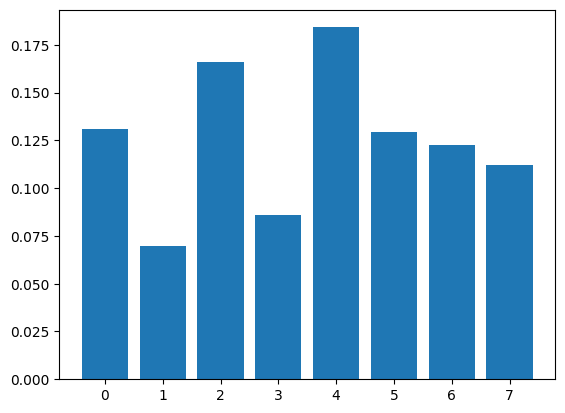

In [27]:
print(best_xgb.feature_importances_)

plt.bar(range(len(best_xgb.feature_importances_)), best_xgb.feature_importances_)
plt.show()

We find that the electrode connected to the right thigh was the most useful in our model's training. Since most people are right handed, it might make more logical sense. Domain specific ideas to improve the results: Average data across time- Smoothing operation can be done after the Max- we can calculate the moving average over the sliding window.
### Source: https://www.researchgate.net/figure/EMG-signal-process-recommended-Green-The-raw-signal-no-treatment-was-applied-until_fig2_258344784

Thanks to UCI for the EMG dataset. If you liked this notebook. Please Upvote it !